***Idea: Use smaller dataset***  

See the predictions and if needed apply prediction for Low High and Close and make arithmetical operations between that 3 values.

In [3]:
import joblib 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from xgboost import XGBRegressor 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
path = r'C:\Users\User\dev\training_model\dataset\gold_data_20_y_cleaned.csv'
df = pd.read_csv(path, parse_dates=['Date'])
df = df.sort_values("Date")
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,Date,IR14270,Open,High,Low,Close,Volume,CPIAUCSL,FEDFUNDS,Open sp500,High sp500,Low sp500,Close sp500,Volume sp500,Open usd_index,High usd_index,Low usd_index,Close usd_index
0,52,2000-08-30,10.4,273.899994,273.899994,273.899994,273.899994,0.0,172.7,6.50,1509.839966,1510.489990,1500.089966,1502.589966,8.184000e+08,112.190002,112.779999,112.110001,112.139999
1,53,2000-08-31,10.4,274.799988,278.299988,274.799988,278.299988,0.0,172.7,6.50,1502.589966,1525.209961,1502.589966,1517.680054,1.056600e+09,111.980003,112.930000,111.779999,112.599998
2,54,2000-09-01,10.2,277.000000,277.000000,277.000000,277.000000,0.0,173.6,6.52,1517.680054,1530.089966,1515.530029,1520.770020,7.677000e+08,112.360001,112.599998,111.250000,111.419998
3,55,2000-09-05,10.2,275.799988,275.799988,275.799988,275.799988,2.0,173.6,6.52,1520.770020,1520.770020,1504.209961,1507.079956,8.385000e+08,111.610001,112.769997,111.500000,112.410004
4,56,2000-09-06,10.2,274.200012,274.200012,274.200012,274.200012,0.0,173.6,6.52,1507.079956,1512.609985,1492.119995,1492.250000,9.951000e+08,112.449997,114.239998,112.320000,114.120003


In [13]:
df.columns

Index(['Unnamed: 0', 'Date', 'IR14270', 'Open', 'High', 'Low', 'Close',
       'Volume', 'CPIAUCSL', 'FEDFUNDS', 'Open sp500', 'High sp500',
       'Low sp500', 'Close sp500', 'Volume sp500', 'Open usd_index',
       'High usd_index', 'Low usd_index', 'Close usd_index'],
      dtype='object')

In [42]:
drop = ['Unnamed: 0', 'IR14270','Volume', 'CPIAUCSL', 'FEDFUNDS', 'Open sp500', 'High sp500',
       'Low sp500', 'Close sp500', 'Volume sp500', 'Open usd_index',
       'High usd_index', 'Low usd_index', 'Close usd_index']

In [43]:
df = df.drop(columns=drop)

In [44]:
df.head()

,Date,Open,High,Low,Close
0,2000-08-30,273.899994,273.899994,273.899994,273.899994
1,2000-08-31,274.799988,278.299988,274.799988,278.299988
2,2000-09-01,277.000000,277.000000,277.000000,277.000000
3,2000-09-05,275.799988,275.799988,275.799988,275.799988
4,2000-09-06,274.200012,274.200012,274.200012,274.200012


In [45]:
lag_cols = ['Open', 'Close', 'High', 'Low', 'Close']

for col in lag_cols:
    df[f'Prev {col}'] = df[f'{col}'].shift(1)

df.head()

,Date,Open,High,Low,Close,Prev Open,Prev Close,Prev High,Prev Low
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,NaN,NaN,NaN,NaN
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,273.899994,273.899994,273.899994,273.899994
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,274.799988,278.299988,278.299988,274.799988
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,277.000000,277.000000,277.000000,277.000000
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,275.799988,275.799988,275.799988,275.799988


In [46]:
df = df.dropna()

drop = ['Open', 'Low', 'High']
df = df.drop(columns=drop)

df.head()

,Date,Close,Prev Open,Prev Close,Prev High,Prev Low
1,2000-08-31,278.299988,273.899994,273.899994,273.899994,273.899994
2,2000-09-01,277.000000,274.799988,278.299988,278.299988,274.799988
3,2000-09-05,275.799988,277.000000,277.000000,277.000000,277.000000
4,2000-09-06,274.200012,275.799988,275.799988,275.799988,275.799988
5,2000-09-07,274.000000,274.200012,274.200012,274.200012,274.200012


In [47]:
len(df)

6218

In [48]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.query("Date >= '2015-01-01'")

In [49]:
len(df)

2629

In [50]:
df.head()

,Date,Close,Prev Open,Prev Close,Prev High,Prev Low
3590,2015-01-02,1186.000000,1199.199951,1183.900024,1199.199951,1182.699951
3591,2015-01-05,1203.900024,1184.000000,1186.000000,1194.500000,1169.500000
3592,2015-01-06,1219.300049,1180.300049,1203.900024,1206.900024,1180.099976
3593,2015-01-07,1210.599976,1203.500000,1219.300049,1220.000000,1203.500000
3594,2015-01-08,1208.400024,1219.199951,1210.599976,1219.199951,1210.599976


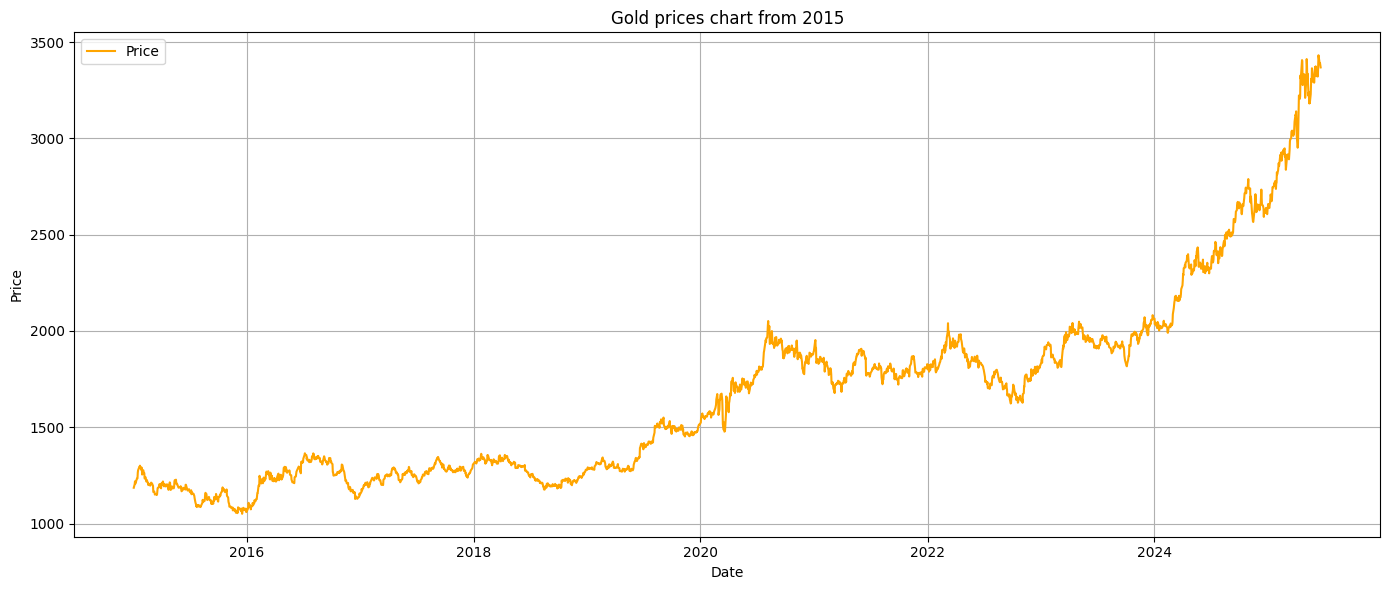

In [25]:
plt.figure(figsize=(14, 6))
plt.title('Gold prices chart from 2015')
plt.plot(df['Date'], df['Close'], label='Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
target = ['Close']
features = [col for col in df.columns if col not in ['Date', target]]

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

df.head()

,Date,Close,Prev Open,Prev Close,Prev High,Prev Low
3590,2015-01-02,0.056797,0.060922,0.055915,0.056610,0.057812
3591,2015-01-05,0.064317,0.054558,0.056797,0.054671,0.052221
3592,2015-01-06,0.070786,0.053008,0.064317,0.059787,0.056711
3593,2015-01-07,0.067132,0.062722,0.070786,0.065192,0.066622
3594,2015-01-08,0.066207,0.069296,0.067132,0.064862,0.069629


In [27]:
X = df[features]
y = df[target]

split_index = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


R² Score: -0.7118
Mean Squared Error: 0.0590


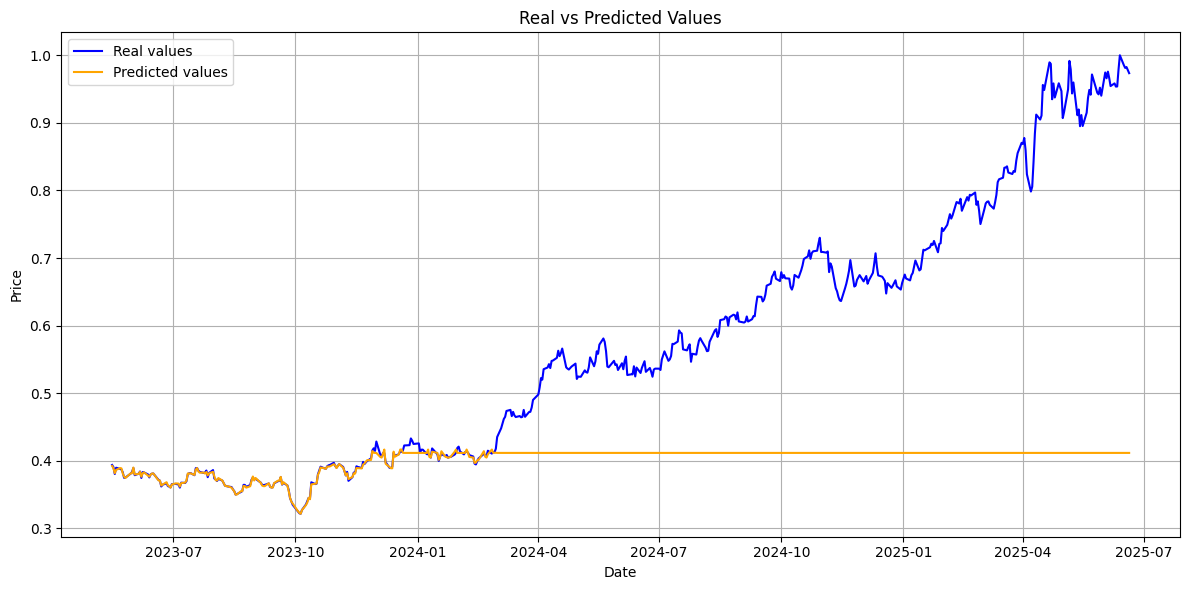

In [28]:
y_pred = xgb.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

df['Date'] = pd.to_datetime(df['Date'])

date_test = df['Date'].iloc[split_index:]

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Real values', color='blue')
plt.plot(date_test, y_pred, label='Predicted values', color='orange')

plt.title('Real vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#--- predicting the High column 
target = ['Prev High']
features = [col for col in df.columns if col not in ['Date', target]]

X = df[features]
y = df[target]

split_index = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

xgb_high = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

y_pred_high = xgb.predict(X_test)


#--- predicting the High column 
target = ['Prev Low']
features = [col for col in df.columns if col not in ['Date', target]]

X = df[features]
y = df[target]

split_index = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

xgb_low = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

y_pred_low = xgb.predict(X_test)

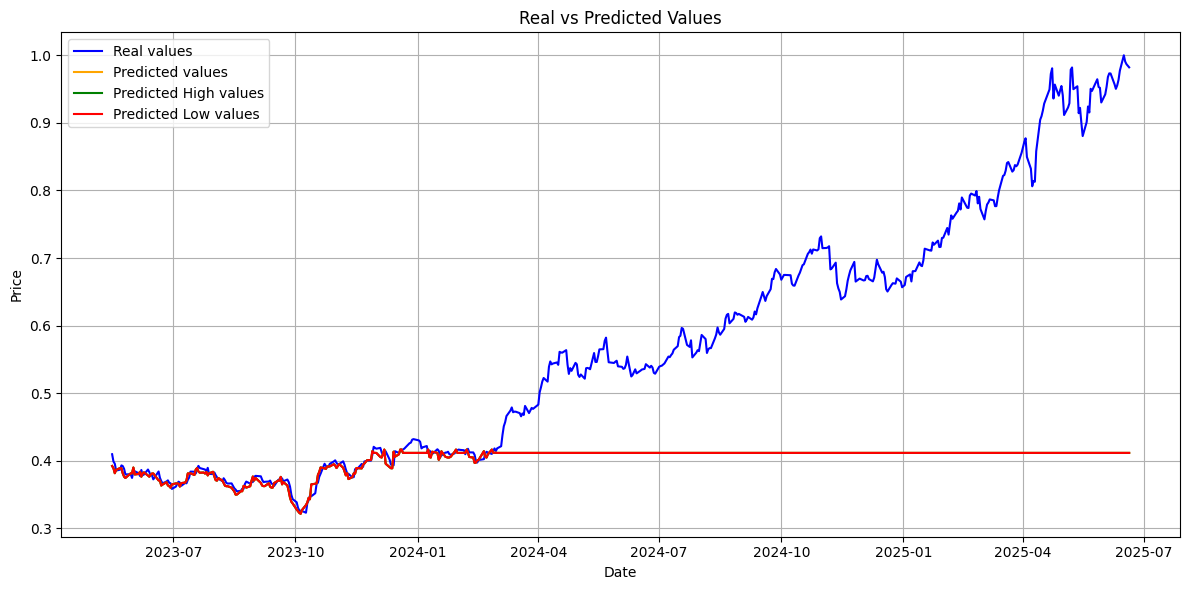

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Real values', color='blue')
plt.plot(date_test, y_pred, label='Predicted values', color='orange')
plt.plot(date_test, y_pred_high, label='Predicted High values', color='green')
plt.plot(date_test, y_pred_low, label='Predicted Low values', color='red')

plt.title('Real vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
columns = ['Prev Open', 'Prev Close', 'Prev High', 'Prev Low']
lags = range(1, 8)  


for col in columns:
    for l in lags:
        df[f'{col}_pct_change_{l}d'] = df[col].pct_change(periods=l) * 100


df.head()

,Date,Close,Prev Open,Prev Close,Prev High,Prev Low,Prev Open_pct_change_1d,Prev Open_pct_change_2d,Prev Open_pct_change_3d,Prev Open_pct_change_4d,...,Prev High_pct_change_5d,Prev High_pct_change_6d,Prev High_pct_change_7d,Prev Low_pct_change_1d,Prev Low_pct_change_2d,Prev Low_pct_change_3d,Prev Low_pct_change_4d,Prev Low_pct_change_5d,Prev Low_pct_change_6d,Prev Low_pct_change_7d
3590,2015-01-02,1186.000000,1199.199951,1183.900024,1199.199951,1182.699951,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3591,2015-01-05,1203.900024,1184.000000,1186.000000,1194.500000,1169.500000,-1.267508,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.116086,NaN,NaN,NaN,NaN,NaN,NaN
3592,2015-01-06,1219.300049,1180.300049,1203.900024,1206.900024,1180.099976,-0.312496,-1.576043,NaN,NaN,...,NaN,NaN,NaN,0.906368,-0.219834,NaN,NaN,NaN,NaN,NaN
3593,2015-01-07,1210.599976,1203.500000,1219.300049,1220.000000,1203.500000,1.965598,1.646959,0.358576,NaN,...,NaN,NaN,NaN,1.982885,2.907225,1.758692,NaN,NaN,NaN,NaN
3594,2015-01-08,1208.400024,1219.199951,1210.599976,1219.199951,1210.599976,1.304524,3.295764,2.972969,1.667779,...,NaN,NaN,NaN,0.589944,2.584527,3.514320,2.359011,NaN,NaN,NaN


In [33]:
df.head()

,Date,Close,Prev Open,Prev Close,Prev High,Prev Low,Prev Open_pct_change_7d,Prev Close_pct_change_7d,Prev High_pct_change_7d,Prev Low_pct_change_7d
3590,2015-01-02,0.056797,0.060922,0.055915,0.056610,0.057812,NaN,NaN,NaN,NaN
3591,2015-01-05,0.064317,0.054558,0.056797,0.054671,0.052221,NaN,NaN,NaN,NaN
3592,2015-01-06,0.070786,0.053008,0.064317,0.059787,0.056711,NaN,NaN,NaN,NaN
3593,2015-01-07,0.067132,0.062722,0.070786,0.065192,0.066622,NaN,NaN,NaN,NaN
3594,2015-01-08,0.066207,0.069296,0.067132,0.064862,0.069629,NaN,NaN,NaN,NaN


In [52]:
df = df.dropna()

In [53]:
df.head()

,Date,Close,Prev Open,Prev Close,Prev High,Prev Low,Prev Open_pct_change_1d,Prev Open_pct_change_2d,Prev Open_pct_change_3d,Prev Open_pct_change_4d,...,Prev High_pct_change_5d,Prev High_pct_change_6d,Prev High_pct_change_7d,Prev Low_pct_change_1d,Prev Low_pct_change_2d,Prev Low_pct_change_3d,Prev Low_pct_change_4d,Prev Low_pct_change_5d,Prev Low_pct_change_6d,Prev Low_pct_change_7d
3597,2015-01-13,1234.300049,1224.199951,1232.699951,1234.400024,1219.099976,1.081659,1.425017,0.410105,1.719979,...,2.278565,3.340312,2.935296,0.727086,1.061090,0.702131,1.296217,3.304805,4.241127,3.077706
3598,2015-01-14,1234.400024,1239.199951,1234.300049,1239.300049,1230.300049,1.225290,2.320203,2.667767,1.640420,...,1.581971,2.684566,3.750527,0.918717,1.652483,1.989555,1.627298,2.226842,4.253883,5.198807
3599,2015-01-15,1264.699951,1229.599976,1234.400024,1243.800049,1225.599976,-0.774691,0.441106,1.527537,1.872409,...,2.017725,1.950824,3.057422,-0.382027,0.533180,1.264143,1.599928,1.239055,1.836309,3.855606
3600,2015-01-16,1276.900024,1231.500000,1264.699951,1265.000000,1227.300049,0.154524,-0.621365,0.596312,1.684421,...,4.055281,3.756566,3.688525,0.138714,-0.243843,0.672633,1.404610,1.740860,1.379487,1.977569
3601,2015-01-20,1294.199951,1256.099976,1276.900024,1279.699951,1256.099976,1.997562,2.155172,1.363785,2.605785,...,4.876250,5.264457,4.962271,2.346608,2.488577,2.097043,3.035026,3.784180,4.128320,3.758467


In [54]:
target = ['Close']
features = [col for col in df.columns if col not in ['Date', target]]

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

df.head()

,Date,Close,Prev Open,Prev Close,Prev High,Prev Low,Prev Open_pct_change_1d,Prev Open_pct_change_2d,Prev Open_pct_change_3d,Prev Open_pct_change_4d,...,Prev High_pct_change_5d,Prev High_pct_change_6d,Prev High_pct_change_7d,Prev Low_pct_change_1d,Prev Low_pct_change_2d,Prev Low_pct_change_3d,Prev Low_pct_change_4d,Prev Low_pct_change_5d,Prev Low_pct_change_6d,Prev Low_pct_change_7d
3597,2015-01-13,0.077088,0.071390,0.076416,0.071134,0.073229,0.597927,0.449721,0.458175,0.532366,...,0.564864,0.632627,0.620253,0.508064,0.502369,0.542450,0.565237,0.639086,0.683286,0.599386
3598,2015-01-14,0.077130,0.077670,0.077088,0.073156,0.077972,0.609467,0.499238,0.555261,0.529115,...,0.531351,0.602642,0.656667,0.523390,0.537429,0.601191,0.579727,0.595227,0.683828,0.687775
3599,2015-01-15,0.089859,0.073651,0.077130,0.075012,0.075982,0.448778,0.395296,0.506228,0.538596,...,0.552315,0.569092,0.625708,0.419364,0.471072,0.568093,0.578529,0.555038,0.581133,0.631802
3600,2015-01-16,0.094984,0.074446,0.089859,0.083760,0.076702,0.523436,0.336526,0.466182,0.530913,...,0.650339,0.651660,0.653897,0.461010,0.425007,0.541104,0.569981,0.575454,0.561728,0.553541
3601,2015-01-20,0.102252,0.084746,0.094984,0.089825,0.088899,0.671515,0.490109,0.499186,0.568568,...,0.689835,0.720609,0.710791,0.637584,0.586996,0.606096,0.641336,0.658590,0.678494,0.627754


In [55]:
features

['Close',
 'Prev Open',
 'Prev Close',
 'Prev High',
 'Prev Low',
 'Prev Open_pct_change_1d',
 'Prev Open_pct_change_2d',
 'Prev Open_pct_change_3d',
 'Prev Open_pct_change_4d',
 'Prev Open_pct_change_5d',
 'Prev Open_pct_change_6d',
 'Prev Open_pct_change_7d',
 'Prev Close_pct_change_1d',
 'Prev Close_pct_change_2d',
 'Prev Close_pct_change_3d',
 'Prev Close_pct_change_4d',
 'Prev Close_pct_change_5d',
 'Prev Close_pct_change_6d',
 'Prev Close_pct_change_7d',
 'Prev High_pct_change_1d',
 'Prev High_pct_change_2d',
 'Prev High_pct_change_3d',
 'Prev High_pct_change_4d',
 'Prev High_pct_change_5d',
 'Prev High_pct_change_6d',
 'Prev High_pct_change_7d',
 'Prev Low_pct_change_1d',
 'Prev Low_pct_change_2d',
 'Prev Low_pct_change_3d',
 'Prev Low_pct_change_4d',
 'Prev Low_pct_change_5d',
 'Prev Low_pct_change_6d',
 'Prev Low_pct_change_7d']

In [56]:
split_index = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [58]:
y_test = y_test.squeeze()  


date_test = date_test.iloc[:len(y_test)]

In [61]:
min_len = min(len(date_test), len(y_test))

In [64]:
date_test = date_test[:min_len]
y_test = y_test[:min_len]
y_pred = y_pred[:min_len]

In [65]:
y_pred = xgb.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

df['Date'] = pd.to_datetime(df['Date'])

date_test = df['Date'].iloc[split_index:]

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Real values', color='blue')
plt.plot(date_test, y_pred, label='Predicted values', color='orange')

plt.title('Real vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [525, 532]